# **Ex2- Linear Regression, Naive Base, Decision Tree

## Names and IDs

1.   Ofir Tamir
2.   Chen Frydman


**Introduction**

This assignment will focus on the linear \ Logistic regression and Decision Trees.
There are two parts: Theoretical and Coding.

# Theoretical



## 1. Decision Tree (15 points)
You will be using a decision tree to classify whether an advertisement was clicked based on its size, position, and whether it played a sound.


1.	Assume that Position is chosen for the root of the decision tree. What is the information gain associated with this attribute? (8 points)
2.	Draw the full decision tree learned from this data (without any pruning). (7 points)


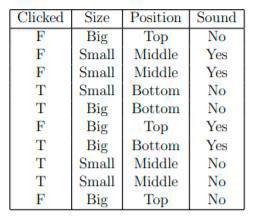

## 2. Naive Base (10 points)
For the same data Using Naïve Base what is the prediction of the new Sample $(big,Middle,No)$.

# 3. Understanding (16 points)
1.  Describe the analytical solution for linear regression with MSE as a distance function. (4 points)
2. What is the problem with information gain? Describe any solution for it. (4 points)
3. Why do we use Gradient Descent or Neotun Roffson for Linear Regression? (4 points)
4. Explain how a Decision tree is used for regression problems. (4 points)

# Code

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Titanic Dataset
The famous Titanic dataset includes 1309 passengers with nine attributes.
In the following question, we will use seven features to classify whether this passenger survived.  
Please use the given dataset and not from another source.

# 1.Logistic regression vs classification tree (19 Points)

Make the classification using  models Logistic regression and Decsion tree models.  
Usr sklearn: sklearn.linear_model.LogisticRegression, sklearn.tree.DecisionTreeClassifier

*   Load the data.
*   Deal with missing values. (5 points)
*   Split Train-Test 20:80 using sklearn.model_selection:train_test_split. (3 pints)
*   Apply Logistic regression. (5 points)
*   Apply Descion tree with max_depth=6 (5 points).
*   Calculate the Acuracey using  sklearn.metrics:accuracy_score. (1 points)


In [ ]:
#Load Data
titanic_data  = pd.read_csv('Titanic.csv')

In [ ]:
# Deal with missing values (for example, you can fill missing values with mean)
titanic_data.fillna(titanic_data.mean(), inplace=True)

In [ ]:
#Split 20:80
# Select features (in this case, using seven features to predict survival)
features = titanic_data.columns.drop(['Passengerid','Survived'])
X = titanic_data[features]
y = titanic_data['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Calculate accuracy for Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy:.4f}')

Logistic Regression Accuracy: 0.7672


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Apply Decision Tree with max_depth=6
decision_tree_model = DecisionTreeClassifier(max_depth=6)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

In [ ]:
# Calculate accuracy for Decision Tree
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print(f'Decision Tree Accuracy: {decision_tree_accuracy:.4f}')

Decision Tree Accuracy: 0.7634


# 2.PreProning (15 Points)
For the same problem described above:
*   Find the best max depth in the range [1,8] of the decision tree using the function sklearn.model_selection.GridSearchCV.


In [ ]:
#Q2
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Define the parameter grid with max_depth values from 1 to 8
param_grid = {'max_depth': range(1, 9)}

# Create GridSearchCV instance
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameter
best_max_depth = grid_search.best_params_['max_depth']
print(f'Best Max Depth: {best_max_depth}')

# Use the best max_depth to create a new Decision Tree model
best_decision_tree_model = DecisionTreeClassifier(max_depth=best_max_depth)
best_decision_tree_model.fit(X_train, y_train)

# Predict using the best model
best_decision_tree_predictions = best_decision_tree_model.predict(X_test)

# Calculate accuracy for the best Decision Tree model
best_decision_tree_accuracy = accuracy_score(y_test, best_decision_tree_predictions)
print(f'Best Decision Tree Accuracy: {best_decision_tree_accuracy:.4f}')


{'max_depth': range(1, 9)}
Best Max Depth: 2
Best Decision Tree Accuracy: 0.7786


# 3.Entropy vs Gini (10 Points)
For the same problem described above:

*   Use max_depth From question 2.
*   Train the model with Entropy. (5 points)
*   Train the model with Gini. (5 points)
*   Using Accuracy score who is better? (5 points)



In [ ]:
#Q3
# Train the Decision Tree model with Entropy
entropy_decision_tree_model = DecisionTreeClassifier(max_depth=best_max_depth, criterion='entropy')
entropy_decision_tree_model.fit(X_train, y_train)
entropy_predictions = entropy_decision_tree_model.predict(X_test)

# Calculate accuracy for the Entropy Decision Tree model
entropy_accuracy = accuracy_score(y_test, entropy_predictions)
print(f'Decision Tree with Entropy Accuracy: {entropy_accuracy:.4f}')

# Train the Decision Tree model with Gini
gini_decision_tree_model = DecisionTreeClassifier(max_depth=best_max_depth, criterion='gini')
gini_decision_tree_model.fit(X_train, y_train)
gini_predictions = gini_decision_tree_model.predict(X_test)

# Calculate accuracy for the Gini Decision Tree model
gini_accuracy = accuracy_score(y_test, gini_predictions)
print(f'Decision Tree with Gini Accuracy: {gini_accuracy:.4f}')

# Compare the models based on accuracy
if entropy_accuracy > gini_accuracy:
    print('Decision Tree with Entropy is better.')
elif entropy_accuracy < gini_accuracy:
    print('Decision Tree with Gini is better.')
else:
    print('Both Decision Trees have the same accuracy.')


Decision Tree with Entropy Accuracy: 0.7786
Decision Tree with Gini Accuracy: 0.7786
Both Decision Trees have the same accuracy.


# 4. Gradient Descent (15 points)

* Assume we have $𝑓(𝑥,𝑦) = 𝑥^2/29+𝑦^2/64$
* Use gradient descent to find local minima, start at $(8.5,8.6)$
* Make 1000 Iteration.

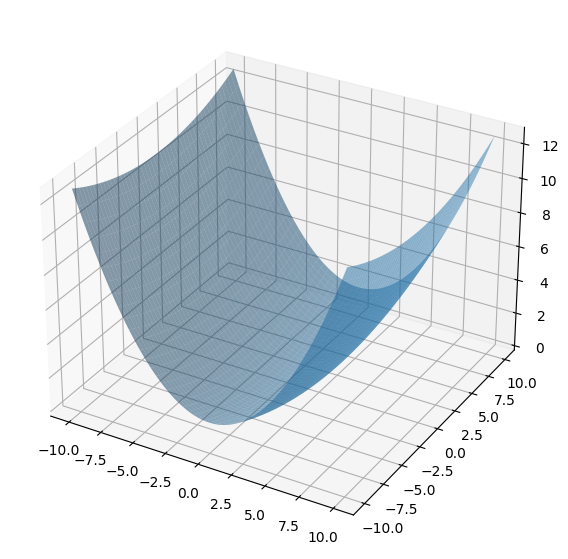

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x,y):
  return np.power(x,2)/9 + np.power(y,2)/64

x = y = np.arange(-10, 10, 0.005)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
fig = plt. figure(figsize=(7, 7))
ax = plt.axes (projection='3d' )
ax. plot_surface(X, Y, Z, alpha=0.5)

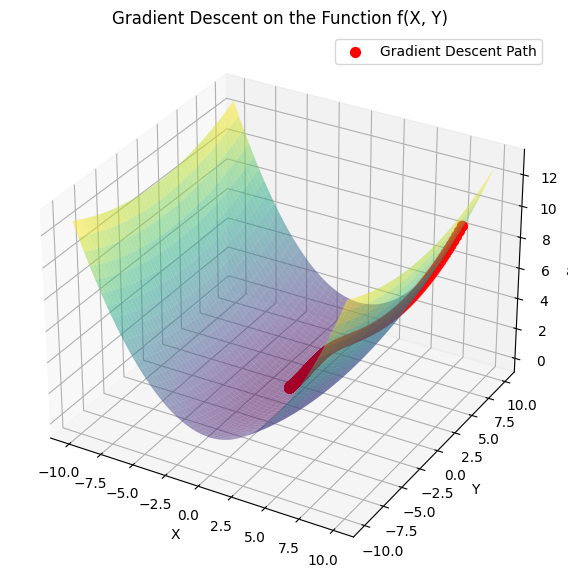

In [ ]:
#Q4
def gradient(x, y):
    df_dx = (2/9) * x
    df_dy = (2/64) * y
    return np.array([df_dx, df_dy])

def gradient_descent(starting_point, learning_rate, iterations):
    path = []
    current_point = starting_point

    for _ in range(iterations):
        path.append(current_point)
        grad = gradient(current_point[0], current_point[1])
        current_point = current_point - learning_rate * grad

    return np.array(path)

# Define the starting point and parameters
starting_point = np.array([8.5, 8.6])
learning_rate = 0.1
iterations = 1000

# Run gradient descent
path = gradient_descent(starting_point, learning_rate, iterations)

# Plot the function and the path of gradient descent
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
ax.scatter(path[:, 0], path[:, 1], func(path[:, 0], path[:, 1]), color='r', marker='o', s=50, label='Gradient Descent Path')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Gradient Descent on the Function f(X, Y)')
plt.legend()
plt.show()